In [1]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv



In [2]:
#create a set of random latitude and longitude

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=98ebd3b43c1f44bc3b3153598e58ce5c


In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Processing Record 1 of Set 12 | ancud
Processing Record 2 of Set 12 | haines junction
Processing Record 3 of Set 12 | ushuaia
Processing Record 4 of Set 12 | atambua
Processing Record 5 of Set 12 | mar del plata
Processing Record 6 of Set 12 | chuy
Processing Record 7 of Set 12 | atuona
Processing Record 8 of Set 12 | barrow
Processing Record 9 of Set 12 | kragero
Processing Record 10 of Set 12 | rikitea
Processing Record 11 of Set 12 | cape town
Processing Record 12 of Set 12 | kruisfontein
Processing Record 13 of Set 12 | broome
Processing Record 14 of Set 12 | butaritari
Processing Record 15 of Set 12 | georgetown
Processing Record 16 of Set 12 | gijon
Processing Record 17 of Set 12 | hermanus
Processing Record 18 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 12 | yellowknife
Processing Record 20 of Set 12 | carnarvon
Processing Record 21 of Set 12 | pevek
Processing Record 22 of Set 12 | lebu
Processing Record 23 of Set 12 | bredasdorp
Processing Recor

Processing Record 35 of Set 15 | bac lieu
City not found. Skipping...
Processing Record 36 of Set 15 | shelburne
Processing Record 37 of Set 15 | iqaluit
Processing Record 38 of Set 15 | verkhnyaya toyma
Processing Record 39 of Set 15 | mazamitla
Processing Record 40 of Set 15 | gorontalo
Processing Record 41 of Set 15 | aykhal
Processing Record 42 of Set 15 | provideniya
Processing Record 43 of Set 15 | rabat
Processing Record 44 of Set 15 | erenhot
Processing Record 45 of Set 15 | matara
Processing Record 46 of Set 15 | santa maria
Processing Record 47 of Set 15 | batagay-alyta
Processing Record 48 of Set 15 | arcachon
Processing Record 49 of Set 15 | penzance
Processing Record 50 of Set 15 | cap-aux-meules
Processing Record 1 of Set 16 | axim
Processing Record 2 of Set 16 | hithadhoo
Processing Record 3 of Set 16 | usinsk
Processing Record 4 of Set 16 | cherskiy
Processing Record 5 of Set 16 | nuuk
Processing Record 6 of Set 16 | nome
Processing Record 7 of Set 16 | meulaboh
Process

Processing Record 19 of Set 19 | bay roberts
Processing Record 20 of Set 19 | chapeco
Processing Record 21 of Set 19 | elat
Processing Record 22 of Set 19 | ugoofaaru
Processing Record 23 of Set 19 | borogontsy
Processing Record 24 of Set 19 | tilichiki
Processing Record 25 of Set 19 | namatanai
Processing Record 26 of Set 19 | buala
Processing Record 27 of Set 19 | sur
Processing Record 28 of Set 19 | boueni
Processing Record 29 of Set 19 | tuy hoa
Processing Record 30 of Set 19 | yabelo
Processing Record 31 of Set 19 | umea
Processing Record 32 of Set 19 | inirida
Processing Record 33 of Set 19 | porto velho
Processing Record 34 of Set 19 | price
Processing Record 35 of Set 19 | guiyang
Processing Record 36 of Set 19 | porto walter
Processing Record 37 of Set 19 | dien bien
City not found. Skipping...
Processing Record 38 of Set 19 | havelock
Processing Record 39 of Set 19 | langham
Processing Record 40 of Set 19 | puertollano
Processing Record 41 of Set 19 | saleaula
City not found.

Processing Record 5 of Set 23 | gorahun
Processing Record 6 of Set 23 | altonia
City not found. Skipping...
Processing Record 7 of Set 23 | fortuna
Processing Record 8 of Set 23 | karakulino
Processing Record 9 of Set 23 | opuwo
Processing Record 10 of Set 23 | jiancheng
Processing Record 11 of Set 23 | lluta
Processing Record 12 of Set 23 | quelimane
Processing Record 13 of Set 23 | gigmoto
Processing Record 14 of Set 23 | tangjiazhuang
Processing Record 15 of Set 23 | serebryansk
Processing Record 16 of Set 23 | lalibela
Processing Record 17 of Set 23 | jefferson city
Processing Record 18 of Set 23 | paita
Processing Record 19 of Set 23 | afgoye
City not found. Skipping...
Processing Record 20 of Set 23 | sataua
City not found. Skipping...
Processing Record 21 of Set 23 | muros
Processing Record 22 of Set 23 | jaciara
Processing Record 23 of Set 23 | dulyapino
Processing Record 24 of Set 23 | chama
Processing Record 25 of Set 23 | qarayeri
Processing Record 26 of Set 23 | vavozh
Proc

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.87,-73.83,68.00,52,81,8.05,CL,2019-11-10 18:43:21
1,Haines Junction,60.75,-137.51,-1.72,68,0,1.50,CA,2019-11-10 18:43:21
2,Ushuaia,-54.81,-68.31,59.00,54,0,5.82,AR,2019-11-10 18:43:21
3,Atambua,-9.11,124.89,74.84,77,0,1.48,ID,2019-11-10 18:38:53
4,Mar Del Plata,-46.43,-67.52,54.21,62,74,19.48,AR,2019-11-10 18:38:58


In [15]:
column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[column_order]

In [16]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2019-11-10 18:43:21,-41.87,-73.83,68.00,52,81,8.05
1,Haines Junction,CA,2019-11-10 18:43:21,60.75,-137.51,-1.72,68,0,1.50
2,Ushuaia,AR,2019-11-10 18:43:21,-54.81,-68.31,59.00,54,0,5.82
3,Atambua,ID,2019-11-10 18:38:53,-9.11,124.89,74.84,77,0,1.48
4,Mar Del Plata,AR,2019-11-10 18:38:58,-46.43,-67.52,54.21,62,74,19.48


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

today

'11/10/19'

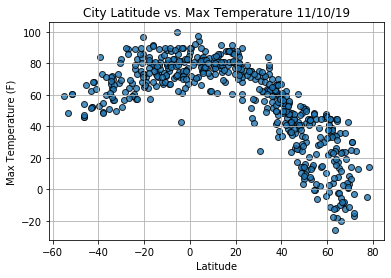

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

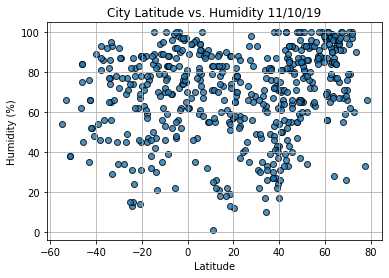

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

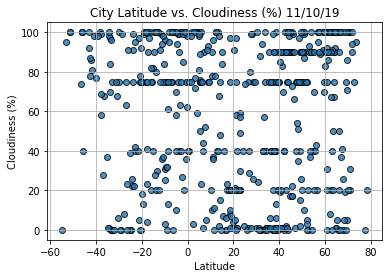

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

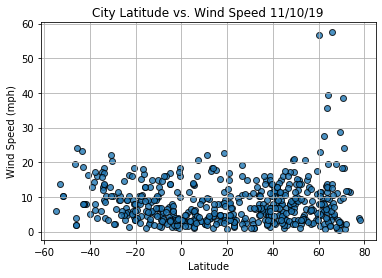

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Haines Junction,CA,2019-11-10 18:43:21,60.75,-137.51,-1.72,68,0,1.50
8,Kragero,NO,2019-11-10 18:43:22,58.87,9.41,30.00,100,90,3.36
12,Broome,GB,2019-11-10 18:43:23,52.47,1.45,44.60,93,20,2.24
13,Butaritari,KI,2019-11-10 18:43:23,3.07,172.79,83.68,70,72,5.61
14,Georgetown,GY,2019-11-10 18:43:24,6.80,-58.16,87.80,70,40,16.11
...,...,...,...,...,...,...,...,...,...
525,Zeewolde,NL,2019-11-10 18:45:41,52.33,5.54,44.01,78,3,3.36
527,Kuching,MY,2019-11-10 18:45:42,1.56,110.34,78.80,94,75,4.70
528,Sawakin,SD,2019-11-10 18:45:42,19.10,37.33,85.68,72,7,7.45
529,Peleduy,RU,2019-11-10 18:45:42,59.63,112.75,-4.18,98,100,3.33


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

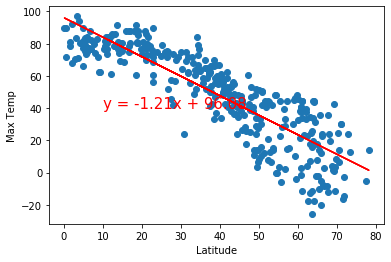

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature \n', 'Max Temp',(10,40))

plt.show()



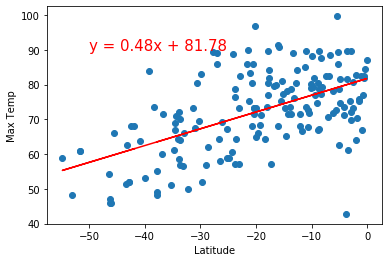

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

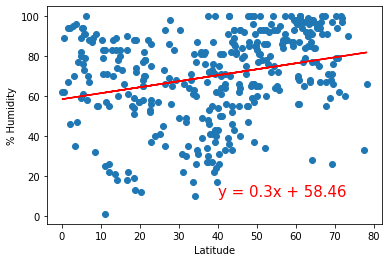

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

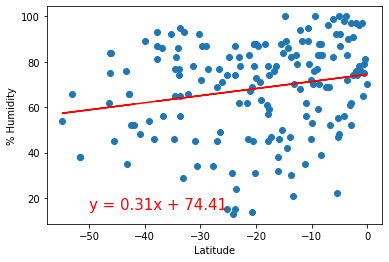

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

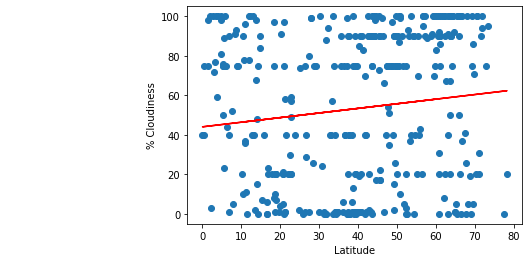

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

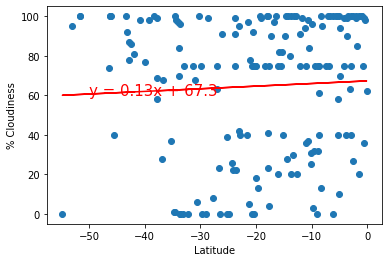

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

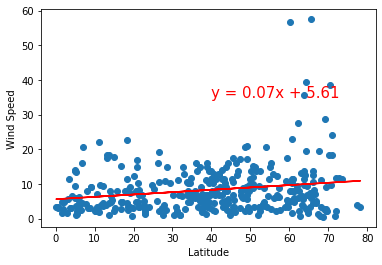

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

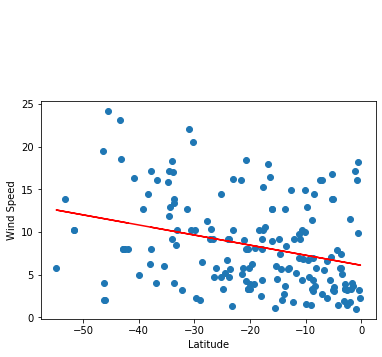

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))